# Twitter Data Processing & Sentiment Analysis
Srivatsa Kundurthy

The cells in this file allow for extraction of text fields from the raw Twitter data.



# Extract Text Fields from Raw Twitter JSON

In [1]:
def find_text(data):
    try:
        content = []
        d = data['data']['search_by_raw_query']['search_timeline']['timeline']['instructions']
        d = dict(d[0])
        e = d['entries']
        for i in range(0,len(e)):
            try:
                e = dict(e[i])
                cont = e['content']['itemContent']['tweet_results']['result']['legacy']['full_text']
                content.append(cont)
            except: 
                continue
    except: 
        return []

In [2]:
import json

contents = []
fpath = '../data/raw/X/nvidia.txt'
with open(fpath, 'r') as f:
    i = 0
    for line in f:
        print(i)
        l = json.loads(line)
        d = l['data']['search_by_raw_query']['search_timeline']['timeline']['instructions']
        d = dict(d[0])
        e = d['entries']
        for entry in e:
            entr = dict(entry)
            try:
                cont = entr['content']['itemContent']['tweet_results']['result']['legacy']['full_text']
                print(cont)
            except:
                continue
            print(i,cont)
            contents.extend(cont)
        i+=1


0
なんなん、ウマ娘とNVIDIAなんなん
0 なんなん、ウマ娘とNVIDIAなんなん
SUCCESS 

@Google's ‘Ultra-Woke’ Gemini AI Runs Amok Revising History

@nvidia  Workers Are So Wealthy They’re Going Into ‘Semi-Retirement’ Mode While On The Clock

Arvind Jain, Founder and CEO of Glean: How to Become One of the Top 1% of Engineers at Google

Book: How To Get A https://t.co/YcIbMYc646
0 SUCCESS 

@Google's ‘Ultra-Woke’ Gemini AI Runs Amok Revising History

@nvidia  Workers Are So Wealthy They’re Going Into ‘Semi-Retirement’ Mode While On The Clock

Arvind Jain, Founder and CEO of Glean: How to Become One of the Top 1% of Engineers at Google

Book: How To Get A https://t.co/YcIbMYc646
おはようございます☀

NVIDIAの高決算からの日経平均株価の最高値更新まで本当におめでたい1日でした‼️

これからも爆益目指して投資を楽しみましょう✊

140字という短い文字制限で思いを伝えきれずに誤解を生むこともあると思いますが、機能をしっかり活用して炎上しても自分を守って行きましょう🦉
0 おはようございます☀

NVIDIAの高決算からの日経平均株価の最高値更新まで本当におめでたい1日でした‼️

これからも爆益目指して投資を楽しみましょう✊

140字という短い文字制限で思いを伝えきれずに誤解を生むこともあると思いますが、機能をしっかり活用して炎上しても自分を守って行きましょう🦉
@BourniTweet @nvidia How do I know you wrote t

In [3]:
# file writer
path = '../data/text_extract/X/nvidia_text.txt'
with open(path, 'w+') as file:
    file.writelines(contents)


# Compute Sentiment for Each Tweet

In [4]:
# contents sentiment procesor 
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sentiments = []

def text_sentiment_aux(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)
    comp_score = score['compound']
    #print(comp_score)
    if comp_score > 0.05:
        return 1
    elif comp_score < -0.05:
        return -1
    else:
        return 0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srivatsakundurthy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
import json
# compute sentiments for tweets, using raw sentiment files
contents = []
fpath = '../data/raw/X/nvidia.txt'
sentiments = []
with open(fpath, 'r') as f:
    i = 0
    for line in f:
        print(i)
        l = json.loads(line)
        d = l['data']['search_by_raw_query']['search_timeline']['timeline']['instructions']
        d = dict(d[0])
        e = d['entries']
        for entry in e:
            entr = dict(entry)
            try:
                cont = entr['content']['itemContent']['tweet_results']['result']['legacy']['full_text']
                score = text_sentiment_aux(cont)
                sentiments.append(score)
                #print(cont)
            except:
                continue
            print(i,cont)
            contents.extend(cont)
        i+=1
sent_dict = dict(zip([-1,0,1],[sentiments.count(-1),sentiments.count(0),sentiments.count(1)]))

0
0 なんなん、ウマ娘とNVIDIAなんなん
0 SUCCESS 

@Google's ‘Ultra-Woke’ Gemini AI Runs Amok Revising History

@nvidia  Workers Are So Wealthy They’re Going Into ‘Semi-Retirement’ Mode While On The Clock

Arvind Jain, Founder and CEO of Glean: How to Become One of the Top 1% of Engineers at Google

Book: How To Get A https://t.co/YcIbMYc646
0 おはようございます☀

NVIDIAの高決算からの日経平均株価の最高値更新まで本当におめでたい1日でした‼️

これからも爆益目指して投資を楽しみましょう✊

140字という短い文字制限で思いを伝えきれずに誤解を生むこともあると思いますが、機能をしっかり活用して炎上しても自分を守って行きましょう🦉
0 @BourniTweet @nvidia How do I know you wrote this?.... 🤔 Perhaps this is also AI generated... 😒
0 人力では不可能なのでAIなんだろうね。NECは実質はレノボで、レノボは生成AI陣営ではNVIDIA＆Google組に属している。つまりハード面では最もリードしている陣営の系列。
日本は政府と世論は反中だが、企業はがっつり中国傘下なので、日本メーカーは反中的なIntelとは相性が悪い。
0 NVIDIAホルダーよりも一生一緒にNVIDIA連呼してる自信ある。持ってないのに
0 コロナが後押しした止まることのないGPU需要、AIバブルも手助けして半導体関連企業が軒並み上がって親玉のNVIDIAは遥か雲の上へ…って感じ？よくわからんけど。
0 ⇨ 【朝イチ報】NYダウ初の3万9000台、NVIDIAは16%高　ハーカー総裁、早過ぎる金融緩和のリスクを強調－年内利下げは適切

●NYダウ456ドル高、初の3万9000台

●予言したＡＩブーム、ウッド氏眺めるだけ
 @takfujimaki #note https://t.co/93P

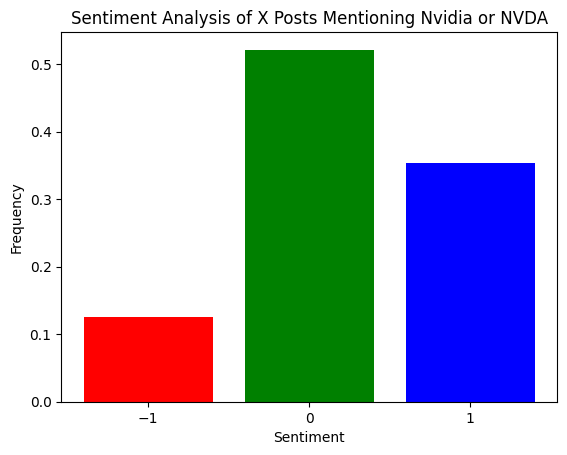

In [9]:
def plot_sentiments(counts):
    import matplotlib.pyplot as plt
    #s = sum(counts.values())
    #print(s)
    percents = [x/sum(counts.values()) for x in list(counts.values())]
                #list(counts.values())/sum(counts.values())
    plt.bar(counts.keys(), percents, color = ['red', 'green', 'blue'])
    plt.xticks([-1,0,1])
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis of X Posts Mentioning Nvidia or NVDA')
    plt.savefig('../visualizations/demo_generations/nvidia_sentiment.png')
    plt.show()
plot_sentiments(sent_dict)

# Split Tweets into Files By Sentiment (for Topic Modeling)

In [10]:
import json

contents = []
#fpath = 'data/raw/nvda.txt'
fpath = '../data/raw/X/nvidia.txt'
sentiments = []
sent_dict = {}
sent_dict[-1] = []
sent_dict[0] = []
sent_dict[1] = []
with open(fpath, 'r') as f:
    i = 0
    for line in f:
        #print(i)
        l = json.loads(line)
        d = l['data']['search_by_raw_query']['search_timeline']['timeline']['instructions']
        d = dict(d[0])
        e = d['entries']
        for entry in e:
            entr = dict(entry)
            try:
                print('try')
                cont = entr['content']['itemContent']['tweet_results']['result']['legacy']['full_text']
                score = text_sentiment_aux(cont)
                sentiments.append(score)
                sent_dict[score].append(cont)
                #print(cont)
            except:
                print('err')
                continue
            print(i,cont)
            contents.extend(cont)
        #print(e)
        i+=1

try
0 なんなん、ウマ娘とNVIDIAなんなん
try
0 SUCCESS 

@Google's ‘Ultra-Woke’ Gemini AI Runs Amok Revising History

@nvidia  Workers Are So Wealthy They’re Going Into ‘Semi-Retirement’ Mode While On The Clock

Arvind Jain, Founder and CEO of Glean: How to Become One of the Top 1% of Engineers at Google

Book: How To Get A https://t.co/YcIbMYc646
try
0 おはようございます☀

NVIDIAの高決算からの日経平均株価の最高値更新まで本当におめでたい1日でした‼️

これからも爆益目指して投資を楽しみましょう✊

140字という短い文字制限で思いを伝えきれずに誤解を生むこともあると思いますが、機能をしっかり活用して炎上しても自分を守って行きましょう🦉
try
0 @BourniTweet @nvidia How do I know you wrote this?.... 🤔 Perhaps this is also AI generated... 😒
try
0 人力では不可能なのでAIなんだろうね。NECは実質はレノボで、レノボは生成AI陣営ではNVIDIA＆Google組に属している。つまりハード面では最もリードしている陣営の系列。
日本は政府と世論は反中だが、企業はがっつり中国傘下なので、日本メーカーは反中的なIntelとは相性が悪い。
try
0 NVIDIAホルダーよりも一生一緒にNVIDIA連呼してる自信ある。持ってないのに
try
0 コロナが後押しした止まることのないGPU需要、AIバブルも手助けして半導体関連企業が軒並み上がって親玉のNVIDIAは遥か雲の上へ…って感じ？よくわからんけど。
try
0 ⇨ 【朝イチ報】NYダウ初の3万9000台、NVIDIAは16%高　ハーカー総裁、早過ぎる金融緩和のリスクを強調－年内利下げは適切

●NYダウ456ドル高、初の3万9000台

●予言したＡＩブーム、ウッド氏眺めるだけ
 @takf

In [11]:
# save sentiment files
for sentiment, contents in sent_dict.items():
    file_name = f"../data/demo_generations/twitter_sentiment_{sentiment}.txt"
    with open(file_name, 'w') as file:
        file.writelines(contents)
